In [11]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# cache_pathの定義
cache_path = r"C:\Users\100ca\Documents\PyCode\etf\data\etf_weekly_close_cache.pkl"

def load_cache():
    """キャッシュされたデータを読み込む関数"""
    with open(cache_path, "rb") as file:  # バイナリ読み込みモードでファイルを開く
        return pickle.load(file)

def calculate_sharpe_ratios():
    """各ETFのシャープレシオを計算し、それに基づいてETFをランキングする関数。週次データを使用。"""
    cache = load_cache()
    sharpe_ratios = {}

    for etf, records in cache.items():
        # recordsが空でない、かつ'Date'キーを含む辞書のリストであることを確認
        if records and all('Date' in record for record in records):
            try:
                prices_df = pd.DataFrame(records).set_index('Date')
                if 'Close' in prices_df.columns:
                    # 週次リターンを計算
                    returns = prices_df['Close'].pct_change()
                    # 年間リターンの平均と標準偏差を計算
                    mean_return = returns.mean() * 52
                    std_dev = returns.std() * np.sqrt(52)
                    # 無リスクレートを0と仮定してシャープレシオを計算
                    if std_dev != 0:  # 0除算を避ける
                        sharpe_ratio = mean_return / std_dev
                        sharpe_ratios[etf] = sharpe_ratio
            except Exception as e:
                print(f"Error processing {etf}: {e}")

    # シャープレシオが0.5以下のものをフィルタリング
    filtered_sharpe_ratios = {etf: ratio for etf, ratio in sharpe_ratios.items() if ratio > 0.5}

    # シャープレシオに基づいてETFをランキング
    sorted_sharpe_ratios = sorted(filtered_sharpe_ratios.items(), key=lambda x: x[1], reverse=True)
    return sorted_sharpe_ratios

def etf_prices():
    """シャープレシオ順にETFの株価をプロットし、それを4つのsubplotに分割して表示する関数"""
    cache = load_cache()
    etf_prices = {}

    # シャープレシオのランキングからETF名を取得
    ranked_etfs = [etf for etf, _ in calculate_sharpe_ratios()]

    for etf in ranked_etfs:
        if etf in cache:
            records = cache[etf]
            if records and all('Date' in record for record in records):
                try:
                    prices_df = pd.DataFrame(records).set_index('Date')
                    if 'Close' in prices_df.columns:
                        etf_prices[etf] = prices_df['Close']
                except Exception as e:
                    print(f"Error processing {etf}: {e}")

    # ETFの株価をCSVファイルに保存
    df_etf_prices = round(pd.DataFrame(etf_prices).dropna(thresh=90, axis=1),1)
    display(df_etf_prices)
    return df_etf_prices


    df_etf_prices.to_csv(r"C:\Users\100ca\Documents\PyCode\etf\data\chart.csv")

    # シャープレシオのランキングを出力
    sharpe_ratios_ranking = calculate_sharpe_ratios()
    for etf, sharpe_ratio in sharpe_ratios_ranking:
        print(f"{etf}: {sharpe_ratio:.2f}")

df_etf_prices = etf_prices()

,SMH,JGRO,MSFU,XLK,SOXX,DXJ,IXN,QQQ,VGT,MGK,...,ACWI,NLR,VIS,DCSX,VOX,MGV,VT,EWT,XLI,FXZ
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-04,NaN,NaN,NaN,NaN,179.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11,NaN,NaN,NaN,NaN,189.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-18,NaN,NaN,NaN,NaN,190.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-25,NaN,NaN,NaN,NaN,189.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,NaN,NaN,NaN,NaN,200.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20,244.3,71.8,46.9,215.2,NaN,109.6,77.9,458.0,545.2,295.8,...,111.7,86.7,241.4,0.6,133.8,118.2,112.0,51.7,124.5,69.6
2024-05-27,240.5,70.7,43.6,210.2,NaN,111.1,76.3,450.7,534.6,292.5,...,111.1,86.8,239.6,0.6,134.1,118.4,111.4,50.3,123.5,69.5
2024-06-03,252.2,72.2,45.3,215.6,NaN,109.8,79.2,463.0,549.8,302.3,...,112.0,81.8,236.0,0.8,135.7,118.2,112.0,51.2,122.3,67.1


In [12]:
import plotly.express as px# シャープレシオのランキングからETF名を取得
ranked_etfs = [etf for etf, _ in calculate_sharpe_ratios()]

# キャッシュからデータをロード
cache = load_cache()

# ETFの52週間の移動平均リターンを計算
etf_returns = {}
for etf in ranked_etfs:
    if etf in cache:
        records = cache[etf]
        if records and all('Date' in record for record in records):
            try:
                prices_df = pd.DataFrame(records).set_index('Date')
                if 'Close' in prices_df.columns:
                    # 52週間の移動平均リターンを計算
                    prices_df['52_Week_Return'] = prices_df['Close'].pct_change(periods=52)
                    etf_returns[etf] = prices_df['52_Week_Return']
            except Exception as e:
                print(f"Error processing {etf}: {e}")

# ETFリターンのDataFrameを作成
df_returns = pd.DataFrame(etf_returns)

# -0.4を下回ったことのある銘柄を除外
filtered_etfs = df_returns.columns[(df_returns.min() > -0.4)]
df_filtered_returns = df_returns[filtered_etfs]

# 除外後の52週リターンを計算し、NaNを除去して最後の20行を表示
df_filtered_returns = round(df_filtered_returns.dropna(how="all").dropna(axis=1, thresh=80), 2)
display(df_filtered_returns.tail(20))

# 52週間の移動平均リターンをプロット
df_long = pd.melt(df_filtered_returns.reset_index(), id_vars=['Date'], var_name='ETF', value_name='52 Week Return')

# Plotly Expressを使用してインタラクティブなグラフを作成
fig = px.line(df_long, x='Date', y='52 Week Return', color='ETF', 
              title='ETFの52週間移動平均リターン', labels={'52 Week Return': '52週間リターン', 'Date': '日付'})

# グラフを表示
fig.show()

,SMH,XLK,SOXX,DXJ,IXN,QQQ,VGT,MGK,FTXL,PSI,...,DLN,DRIV,ACWI,NLR,VIS,MGV,VT,EWT,XLI,FXZ
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-05,0.67,0.48,0.51,0.42,0.45,0.46,0.44,0.47,0.38,0.34,...,0.07,0.01,0.16,0.30,0.17,0.08,0.15,0.04,0.14,-0.04
2024-02-12,0.66,0.45,0.50,0.43,0.42,0.43,0.41,0.45,0.36,0.34,...,0.08,-0.01,0.16,0.27,0.16,0.09,0.15,0.04,0.15,-0.04
2024-02-19,0.75,0.51,0.57,0.48,0.49,0.50,0.46,0.52,0.43,0.36,...,0.13,0.02,0.21,0.27,0.21,0.13,0.20,0.06,0.20,-0.02
2024-02-26,0.80,0.50,0.62,0.46,0.48,0.49,0.46,0.50,0.47,0.42,...,0.12,0.02,0.19,0.32,0.19,0.12,0.18,0.04,0.17,-0.06
2024-03-04,0.89,0.53,NaN,0.48,0.52,0.52,0.50,0.54,0.52,NaN,...,0.18,0.08,0.25,0.39,0.26,0.18,0.24,0.11,0.24,0.06
2024-03-11,0.74,0.43,NaN,0.56,0.43,0.42,0.41,0.45,0.43,NaN,...,0.19,0.07,0.25,0.37,0.30,0.20,0.23,0.11,0.26,0.11
2024-03-18,0.79,0.44,NaN,0.60,0.44,0.44,0.42,0.46,0.45,NaN,...,0.19,0.08,0.25,0.44,0.33,0.21,0.24,0.07,0.29,0.12
2024-03-25,0.71,0.38,NaN,0.53,0.38,0.38,0.36,0.40,0.40,NaN,...,0.17,0.04,0.21,0.37,0.28,0.18,0.20,0.07,0.24,0.09
2024-04-01,0.76,0.38,NaN,0.55,0.38,0.38,0.36,0.40,0.43,NaN,...,0.14,0.07,0.20,0.45,0.33,0.15,0.19,0.08,0.29,0.13


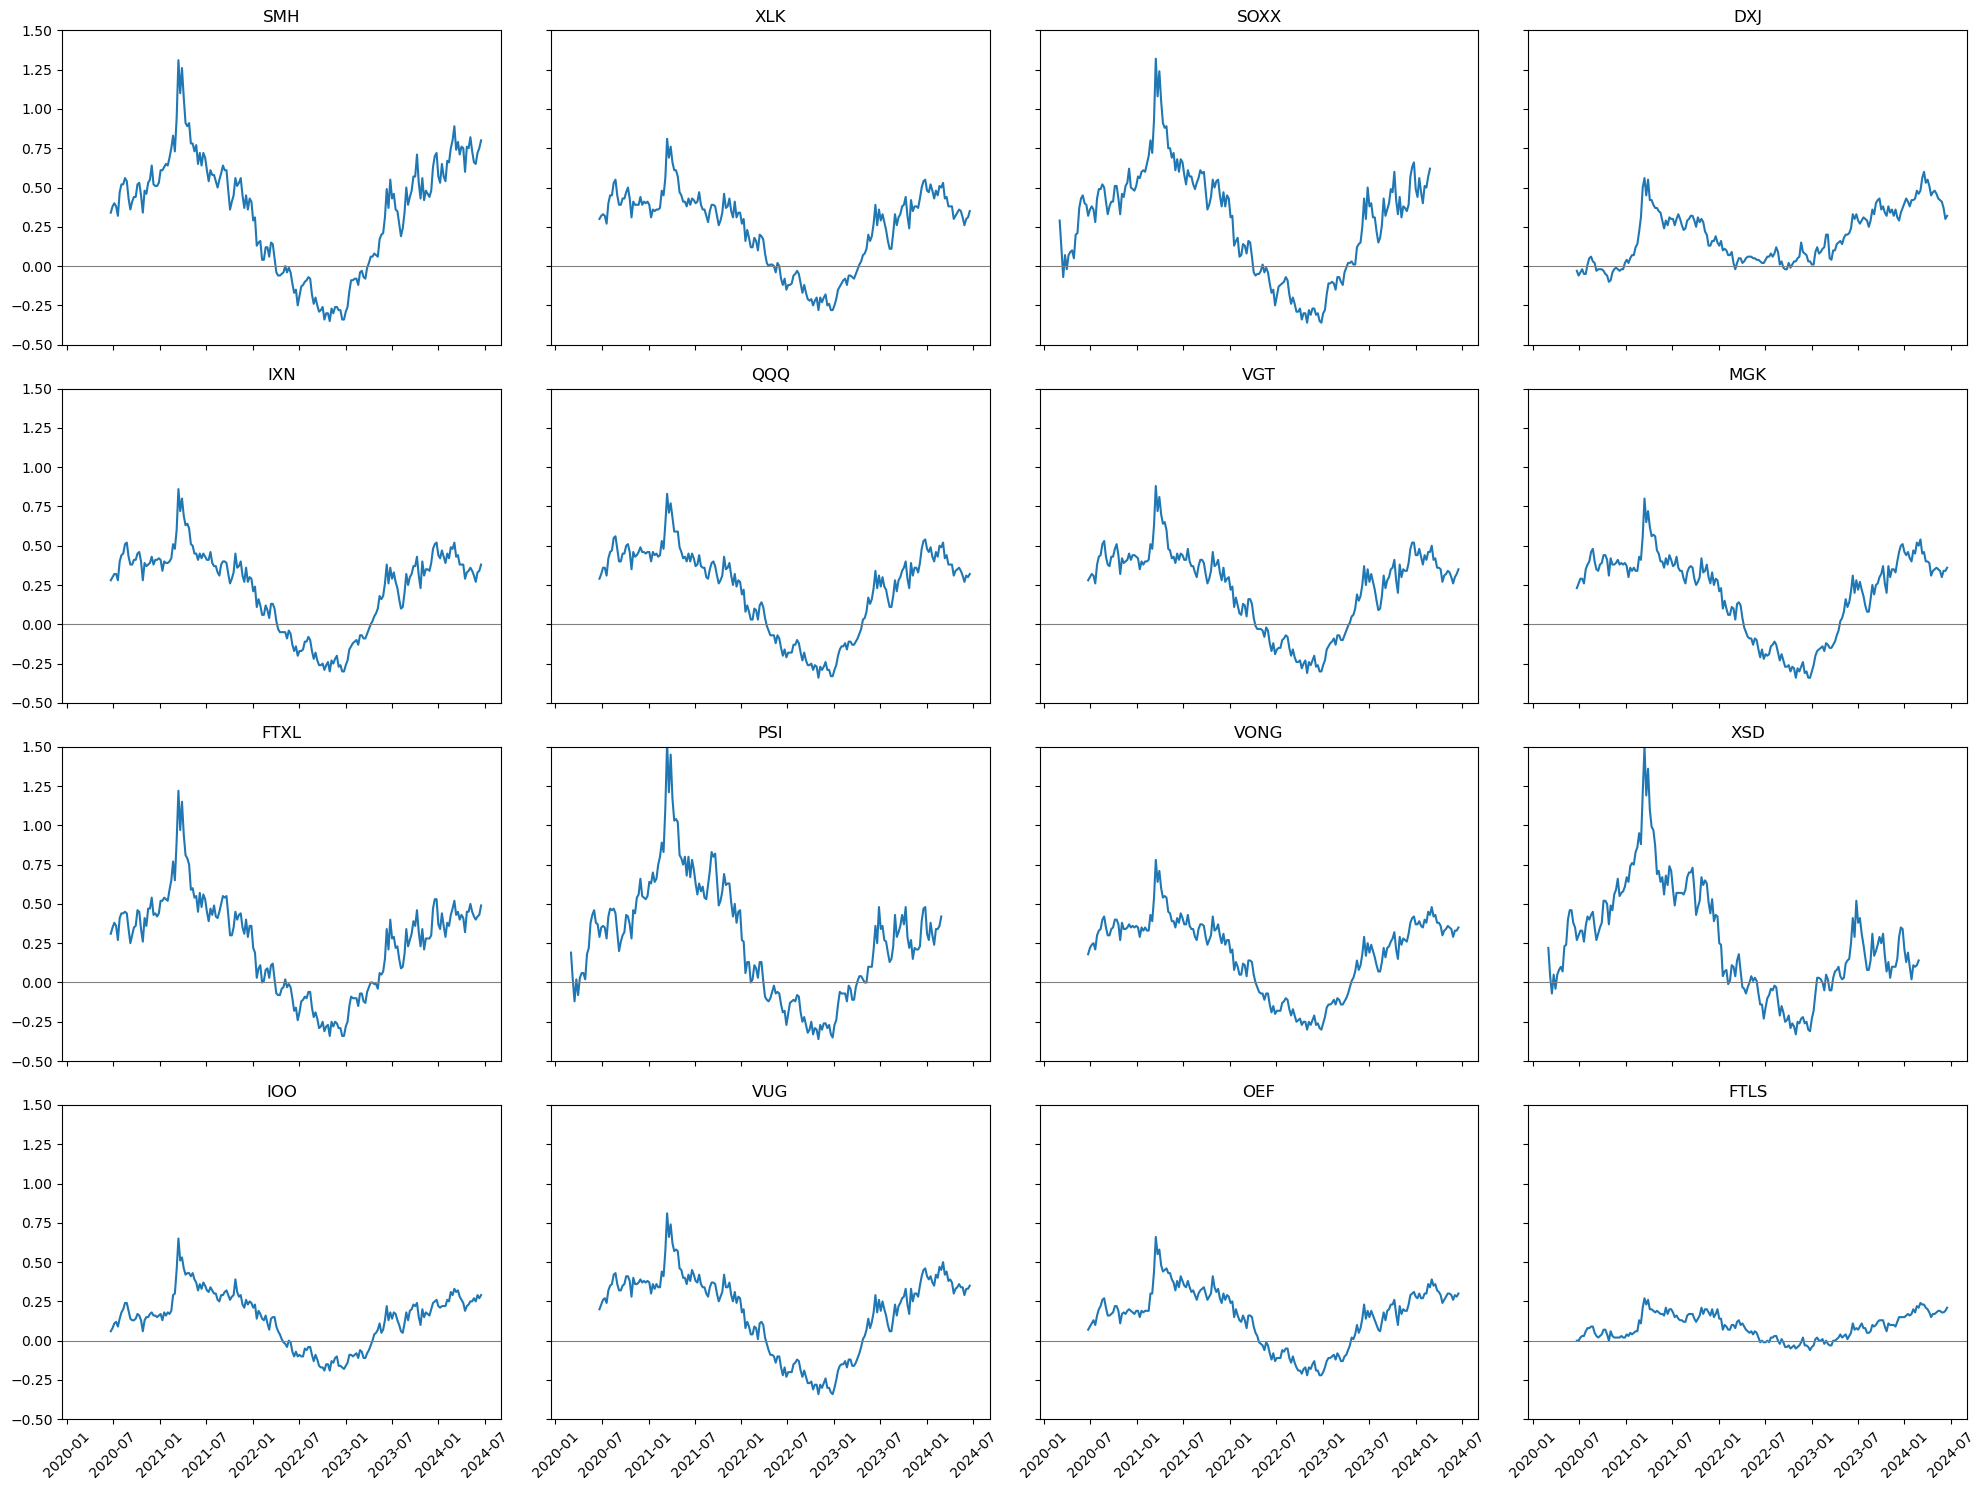

In [13]:
# 上位16個のETFを4x4のsubplotでプロットし、縦軸を-50%から150%で統一し、0には線を引く
top_16_etfs = df_long['ETF'].unique()[:16]  # 上位16個のETF名を取得
fig, axs = plt.subplots(4, 4, figsize=(20, 15), sharex=True, sharey=True)  # 4x4のsubplotを作成、軸を共有

for i, etf in enumerate(top_16_etfs):
    ax = axs[i//4, i%4]  # subplotの位置を決定
    df_subset = df_long[df_long['ETF'] == etf]  # ETFに対応するデータを抽出
    ax.plot(df_subset['Date'], df_subset['52 Week Return'], label='年率リターン')  # プロット
    ax.axhline(0, color='gray', linewidth=0.8)  # 0の位置に線を引く
    ax.set_title(etf)  # タイトルをETF名に設定
    ax.tick_params(axis='x', rotation=45)  # X軸のラベルを45度回転
    ax.set_ylim(-0.5, 1.5)  # 縦軸の範囲を-50%から150%に設定

# 全てのsubplotで軸が共有されているため、最下行と最左列のみラベルを表示
for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()  # subplot間のスペースを調整
plt.show()  # グラフを表示